In [2]:
### Load data IMU CSV dan dibersihkan tahap 1###
import pandas as pd
import emoji


# Baca data CSV
df = pd.read_excel('imudata_baru.xlsx')

# 1. Tampilkan info umum data
print(df.info())
print(df.head())

# 2. Buang kolom yang tidak relevan (ganti 'kolom_tidak_dipakai' sesuai kebutuhan)
# df.drop(columns=['kolom_tidak_dipakai'], inplace=True)

# 3. Tangani nilai hilang (missing values)
# Contoh: isi dengan median, hapus, atau metode lain
# df = df.dropna()  # jika ingin langsung membuang baris yang ada NaN
# df['kolom_angka'] = df['kolom_angka'].fillna(df['kolom_angka'].median())

# 4. Bersihkan data string, misalnya hapus spasi putih atau ubah ke lowercase
# df['nama_kolom'] = df['nama_kolom'].str.strip().str.lower()

# 5. Ubah tipe data jika perlu
# df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')
# df['angka'] = pd.to_numeric(df['angka'], errors='coerce')

# 6. Buang duplikat
df.drop_duplicates(inplace=True)

# 7. Simpan data yang sudah dibersihkan
df.to_csv('data_imu_clean1.csv', index=False)
print("Data berhasil dibersihkan dan disimpan sebagai 'data_imu_clean1.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ax      1085 non-null   object 
 1   ay      1085 non-null   object 
 2   az      1085 non-null   float64
 3   gx      1085 non-null   float64
 4   gy      1085 non-null   float64
 5   gz      1085 non-null   float64
 6   label   1085 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 59.5+ KB
None
         ax        ay        az        gx        gy        gz  label
0 -0.078629 -0.072346  0.328973 -0.030680 -0.117878 -0.096649      1
1  0.027023  0.135176  0.212524 -0.082713  0.010752  0.040630      1
2  0.127246   0.04087 -0.545340 -0.049066  0.074546  0.170800      1
3  0.009516  0.053802 -0.926224 -0.057500  0.105462 -0.438776      1
4 -0.006466  0.918721  0.430050 -0.146734  0.144089  0.588326      1
Data berhasil dibersihkan dan disimpan sebagai 'data_imu_clean1.csv'


In [32]:
import pandas as pd

# Load CSV dan paksa semua nilai ke bentuk numerik
df = pd.read_csv("data_imu_clean1.csv")

# Buang spasi putih di awal/akhir sel
df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)

# Konversi semua kolom ke numeric jika bisa, dan paksa NaN jika gagal
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop baris dengan NaN akibat parsing gagal
df.dropna(inplace=True)
df.to_csv("data_imu_oke.csv", index=False)
print("File bersih disimpan sebagai: data_imu_oke.csv")

print("Data berhasil dibersihkan dari nilai yang tidak bisa dikonversi.")


File bersih disimpan sebagai: data_imu_oke.csv
Data berhasil dibersihkan dari nilai yang tidak bisa dikonversi.


/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_2563/116616241.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


Label yang ditemukan: [ 1  0 10]


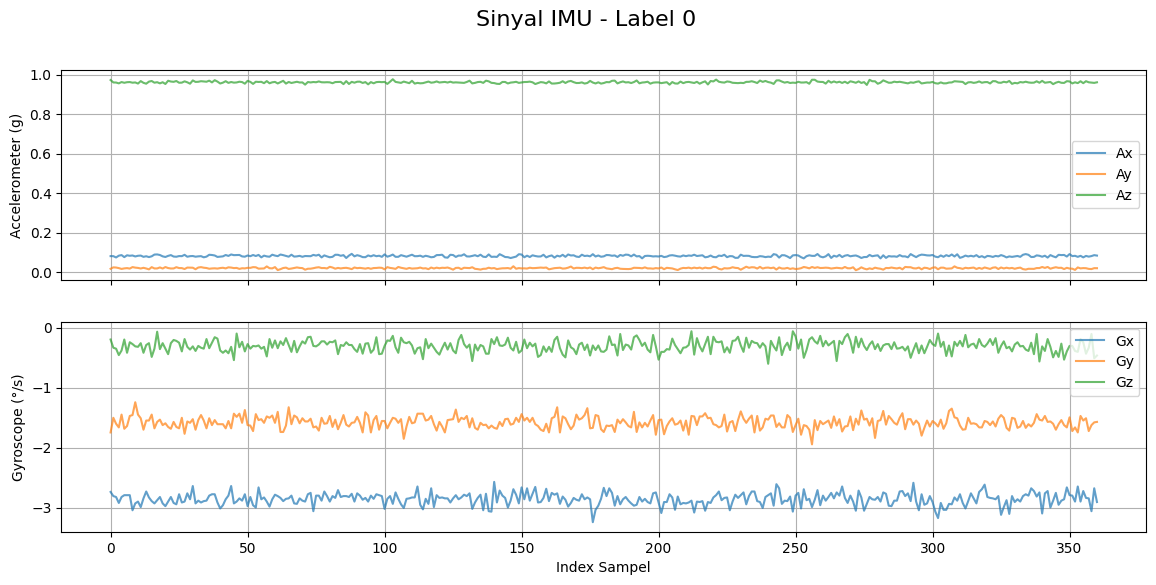

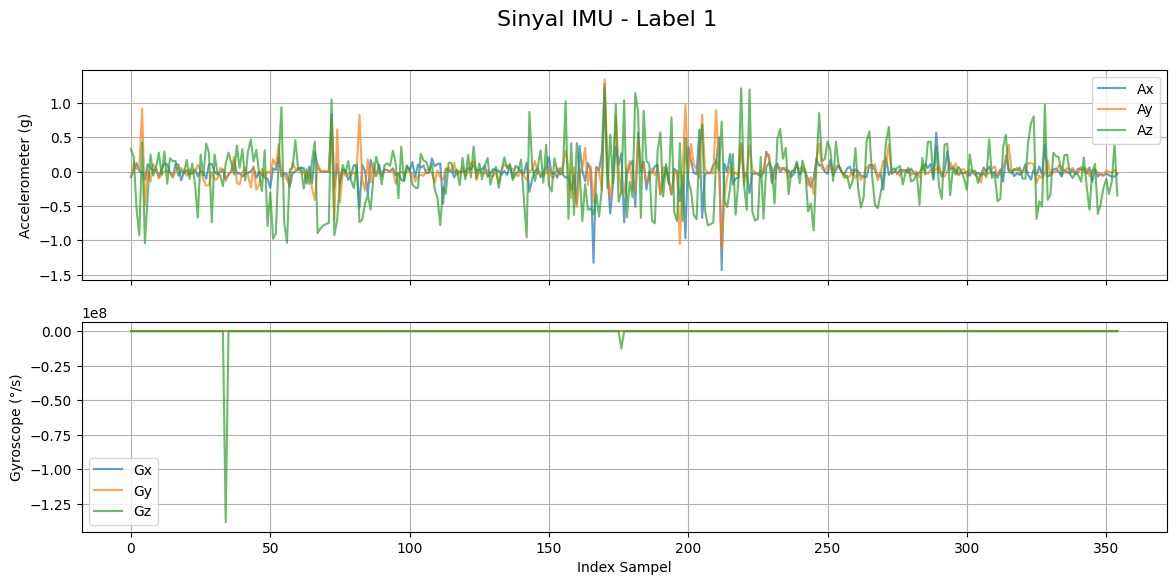

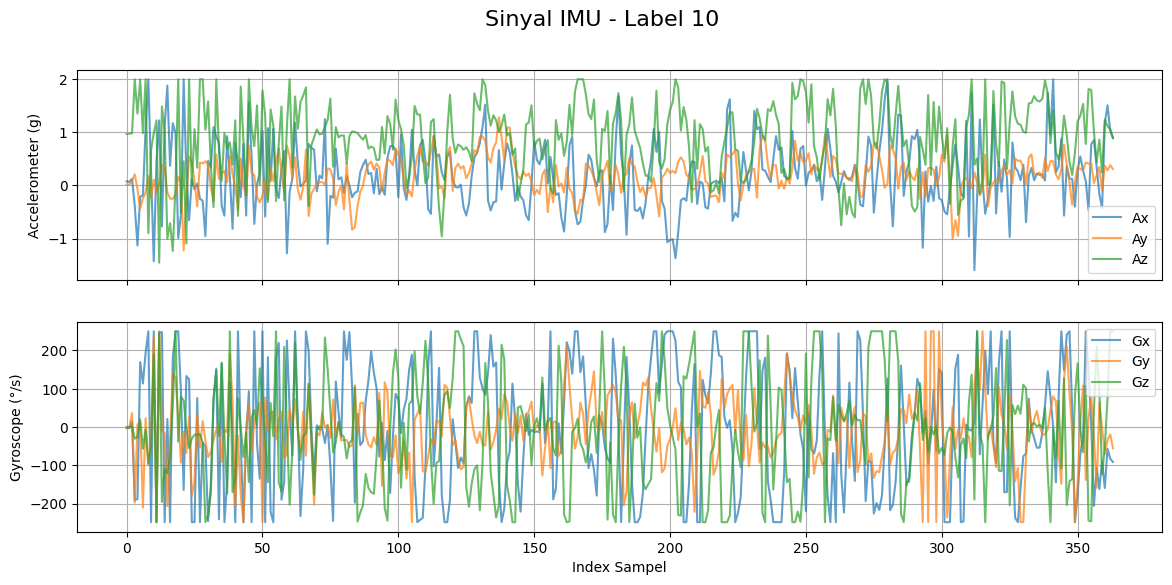

In [4]:
### Visualisasi data IMU
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv("data_imu_oke.csv")

# Tampilkan label unik
print("Label yang ditemukan:", df['label'].unique())

# Loop visualisasi per label
for label in sorted(df['label'].unique()):
    subset = df[df['label'] == label].reset_index(drop=True)

    fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
    fig.suptitle(f'Sinyal IMU - Label {label}', fontsize=16)

    # Akselerometer
    axs[0].plot(subset['ax'], label='Ax', alpha=0.7)
    axs[0].plot(subset['ay'], label='Ay', alpha=0.7)
    axs[0].plot(subset['az'], label='Az', alpha=0.7)
    axs[0].set_ylabel('Accelerometer (g)')
    axs[0].legend()
    axs[0].grid(True)

    # Gyroscope
    axs[1].plot(subset['gx'], label='Gx', alpha=0.7)
    axs[1].plot(subset['gy'], label='Gy', alpha=0.7)
    axs[1].plot(subset['gz'], label='Gz', alpha=0.7)
    axs[1].set_ylabel('Gyroscope (°/s)')
    axs[1].set_xlabel('Index Sampel')
    axs[1].legend()
    axs[1].grid(True)

In [5]:
import pandas as pd

# Baca data IMU
df = pd.read_csv("data_imu_oke.csv")

# Tampilkan 5 baris pertama dari setiap label
for label in sorted(df['label'].unique()):
    sample = df[df['label'] == label][['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'label']].head(5)
    print(f"\n Cuplikan Data untuk Label {label} (5 Baris):")
    print(sample.to_string(index=False))
    



 Cuplikan Data untuk Label 0 (5 Baris):
      ax       ay       az        gx        gy        gz  label
0.080566 0.016357 0.972900 -2.740458 -1.748092 -0.198473      0
0.080322 0.023438 0.960693 -2.809160 -1.503817 -0.335878      0
0.073730 0.022705 0.960205 -2.824427 -1.603053 -0.351145      0
0.082764 0.019775 0.956055 -2.923664 -1.664122 -0.458015      0
0.085693 0.015625 0.962646 -2.824427 -1.450382 -0.381679      0

 Cuplikan Data untuk Label 1 (5 Baris):
       ax        ay        az        gx        gy        gz  label
-0.078629 -0.072346  0.328973 -0.030680 -0.117878 -0.096649      1
 0.027023  0.135176  0.212524 -0.082713  0.010752  0.040630      1
 0.127246  0.040870 -0.545340 -0.049066  0.074546  0.170800      1
 0.009516  0.053802 -0.926224 -0.057500  0.105462 -0.438776      1
-0.006466  0.918721  0.430050 -0.146734  0.144089  0.588326      1

 Cuplikan Data untuk Label 10 (5 Baris):
       ax        ay       az          gx          gy         gz  label
 0.079102  0.016357

In [6]:
import matplotlib.pyplot as plt

def plot_imu_combined(subset, save_path="imu_visual.png"):
    fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

    # Akselerometer
    axs[0].plot(subset['ax'], label='Ax', alpha=0.7)
    axs[0].plot(subset['ay'], label='Ay', alpha=0.7)
    axs[0].plot(subset['az'], label='Az', alpha=0.7)
    axs[0].set_ylabel('Accelerometer (g)')
    axs[0].set_title('Sinyal Akselerometer')
    axs[0].legend()
    axs[0].grid(True)

    # Gyroscope
    axs[1].plot(subset['gx'], label='Gx', alpha=0.7)
    axs[1].plot(subset['gy'], label='Gy', alpha=0.7)
    axs[1].plot(subset['gz'], label='Gz', alpha=0.7)
    axs[1].set_ylabel('Gyroscope (°/s)')
    axs[1].set_xlabel('Index Sampel')
    axs[1].set_title('Sinyal Gyroscope')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    print(f" Grafik berhasil disimpan ke: {save_path}")
    plt.show()


Gambar disimpan sebagai: imu_2color_labels_axes.png


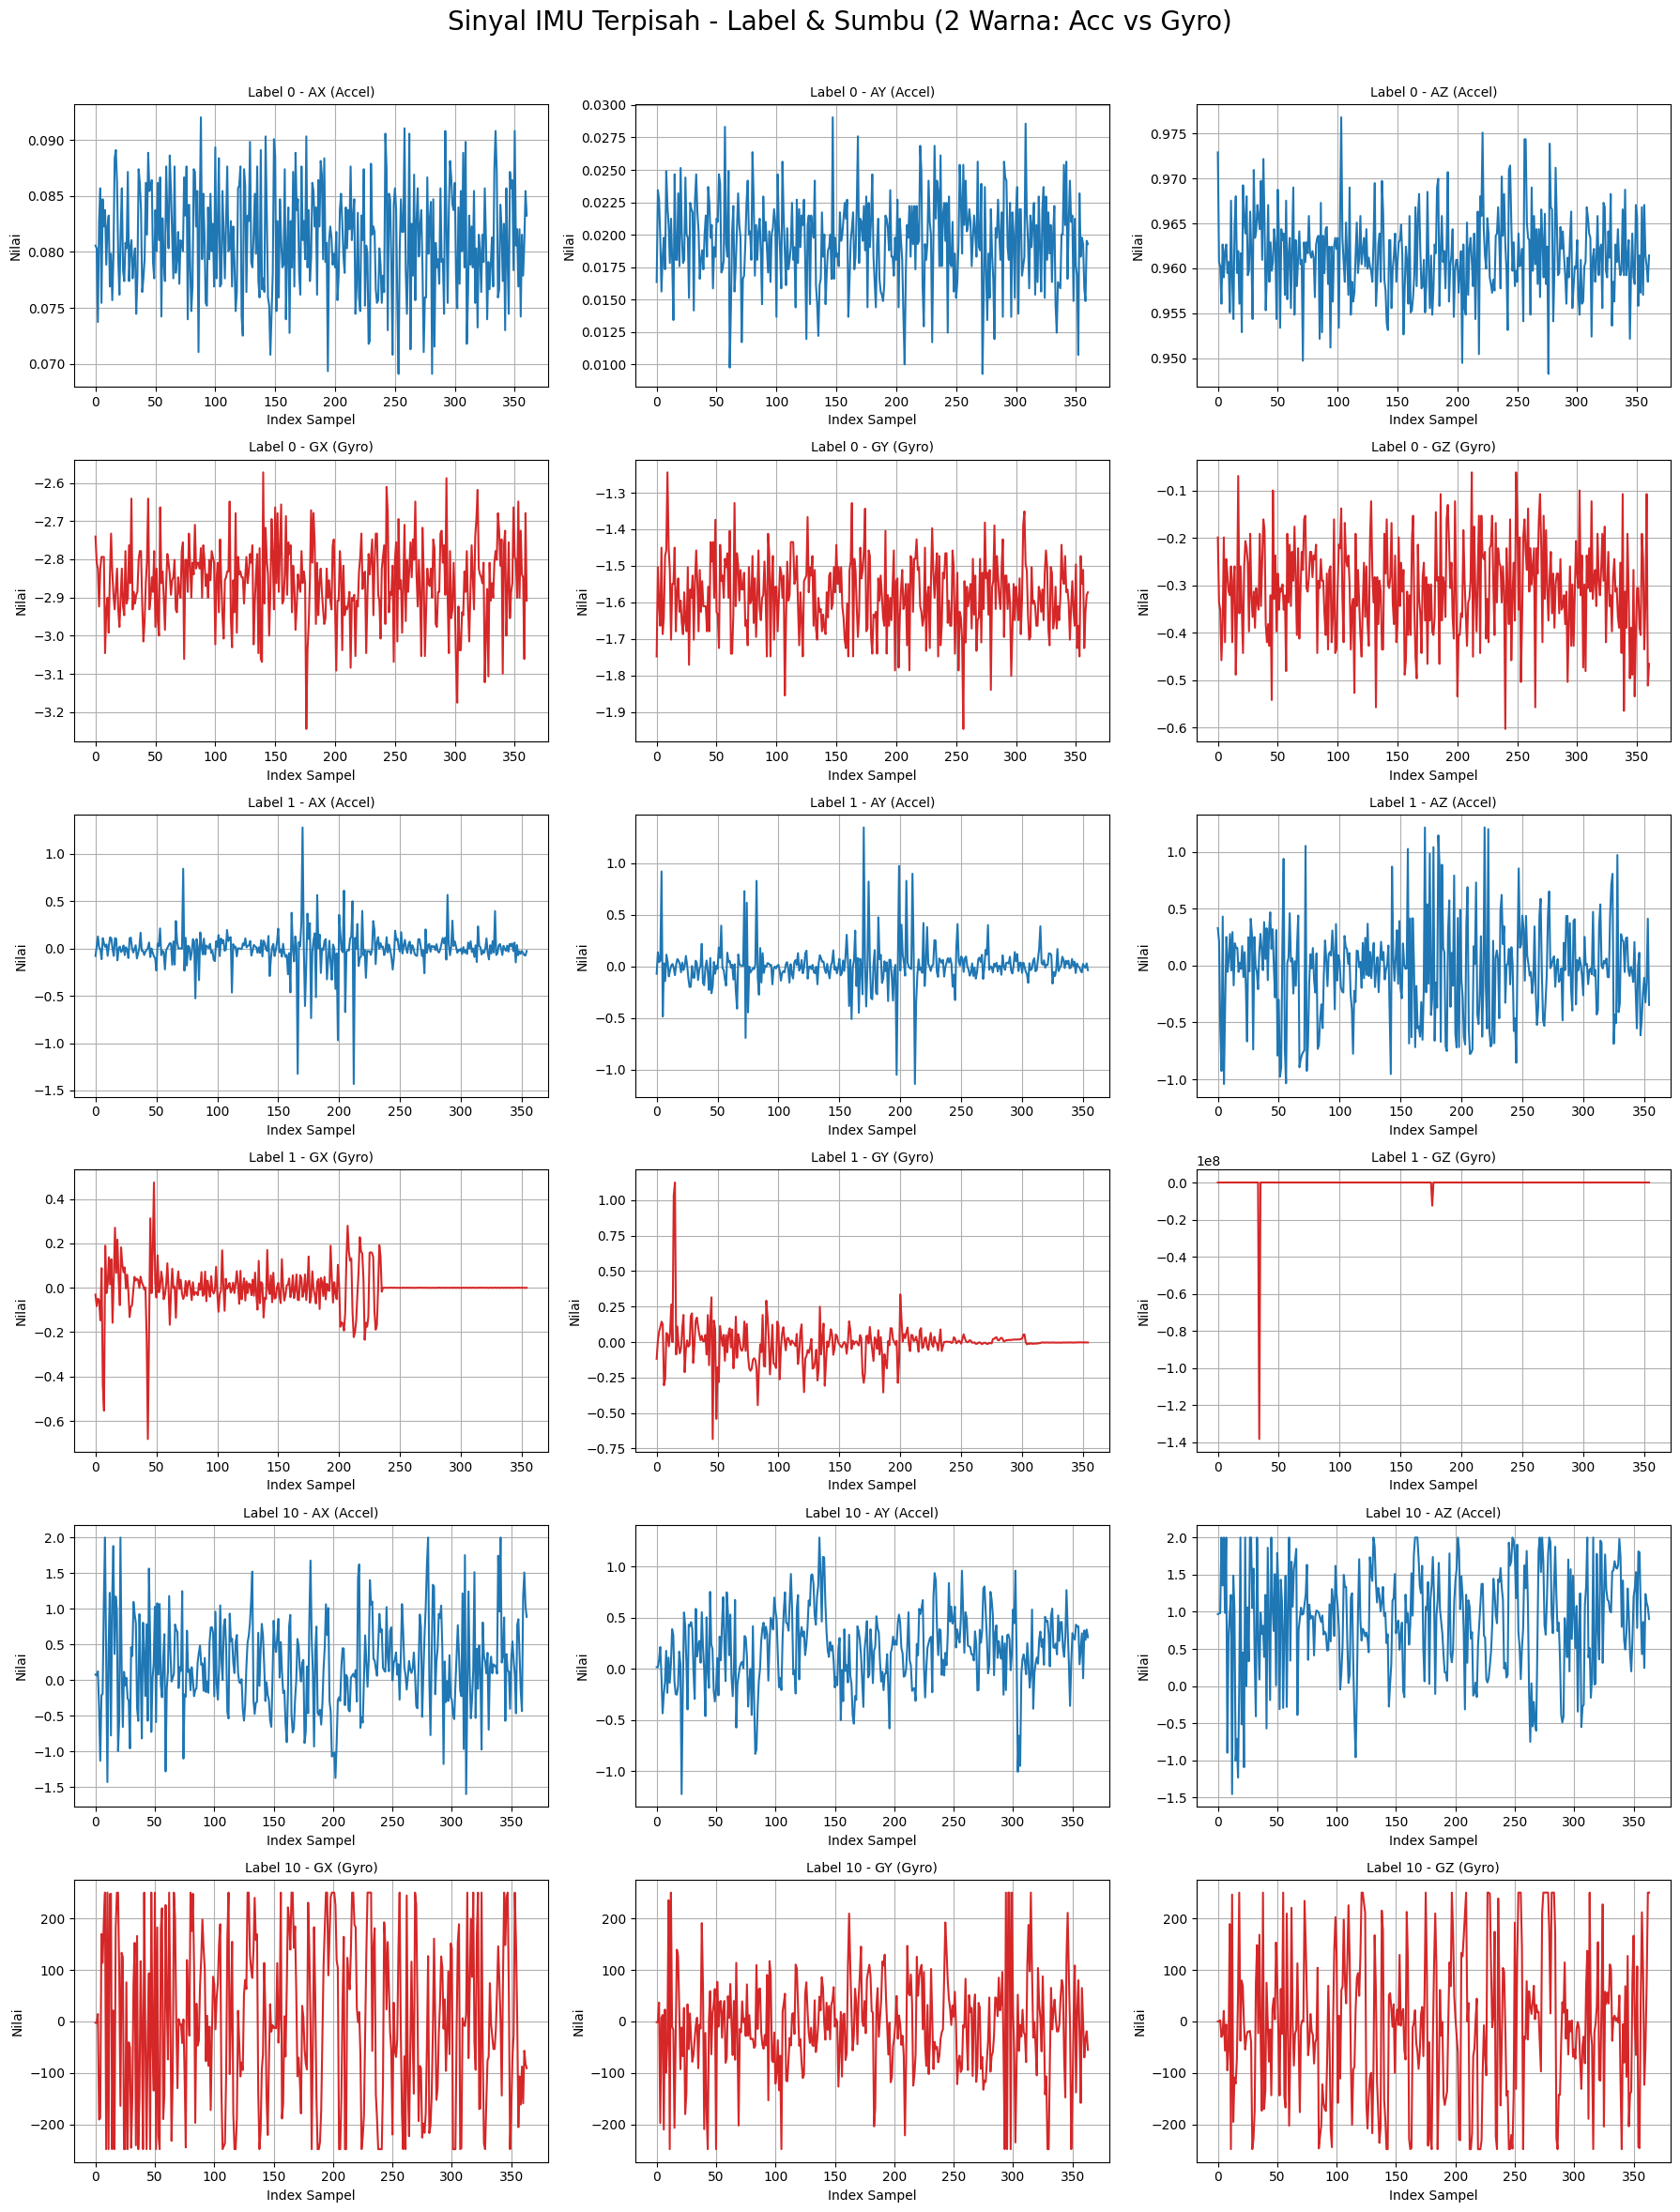

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data_imu_oke.csv")
unique_labels = sorted(df['label'].unique())
axes_acc = ['ax', 'ay', 'az']
axes_gyro = ['gx', 'gy', 'gz']
total_plots = len(unique_labels) * (len(axes_acc) + len(axes_gyro))

# Definisi warna
acc_color = 'tab:blue'
gyro_color = 'tab:red'

# Buat grid subplot
cols = 3
rows = total_plots // cols + (total_plots % cols != 0)
fig, axs = plt.subplots(rows, cols, figsize=(18, 4 * rows))
fig.suptitle("Sinyal IMU Terpisah - Label & Sumbu (2 Warna: Acc vs Gyro)", fontsize=20)
axs = axs.flatten()

plot_idx = 0
for label in unique_labels:
    subset = df[df['label'] == label].reset_index(drop=True)

    for axis in axes_acc:
        axs[plot_idx].plot(subset[axis], color=acc_color)
        axs[plot_idx].set_title(f'Label {label} - {axis.upper()} (Accel)', fontsize=10)
        axs[plot_idx].set_xlabel('Index Sampel')
        axs[plot_idx].set_ylabel('Nilai')
        axs[plot_idx].grid(True)
        plot_idx += 1

    for axis in axes_gyro:
        axs[plot_idx].plot(subset[axis], color=gyro_color)
        axs[plot_idx].set_title(f'Label {label} - {axis.upper()} (Gyro)', fontsize=10)
        axs[plot_idx].set_xlabel('Index Sampel')
        axs[plot_idx].set_ylabel('Nilai')
        axs[plot_idx].grid(True)
        plot_idx += 1

# Kosongkan subplot sisa jika ada
for i in range(plot_idx, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("imu_2color_labels_axes.png", dpi=300)
print("Gambar disimpan sebagai: imu_2color_labels_axes.png")
plt.show()


📁 Gambar KDE disimpan sebagai: imu_kde_per_label_sumbu.png


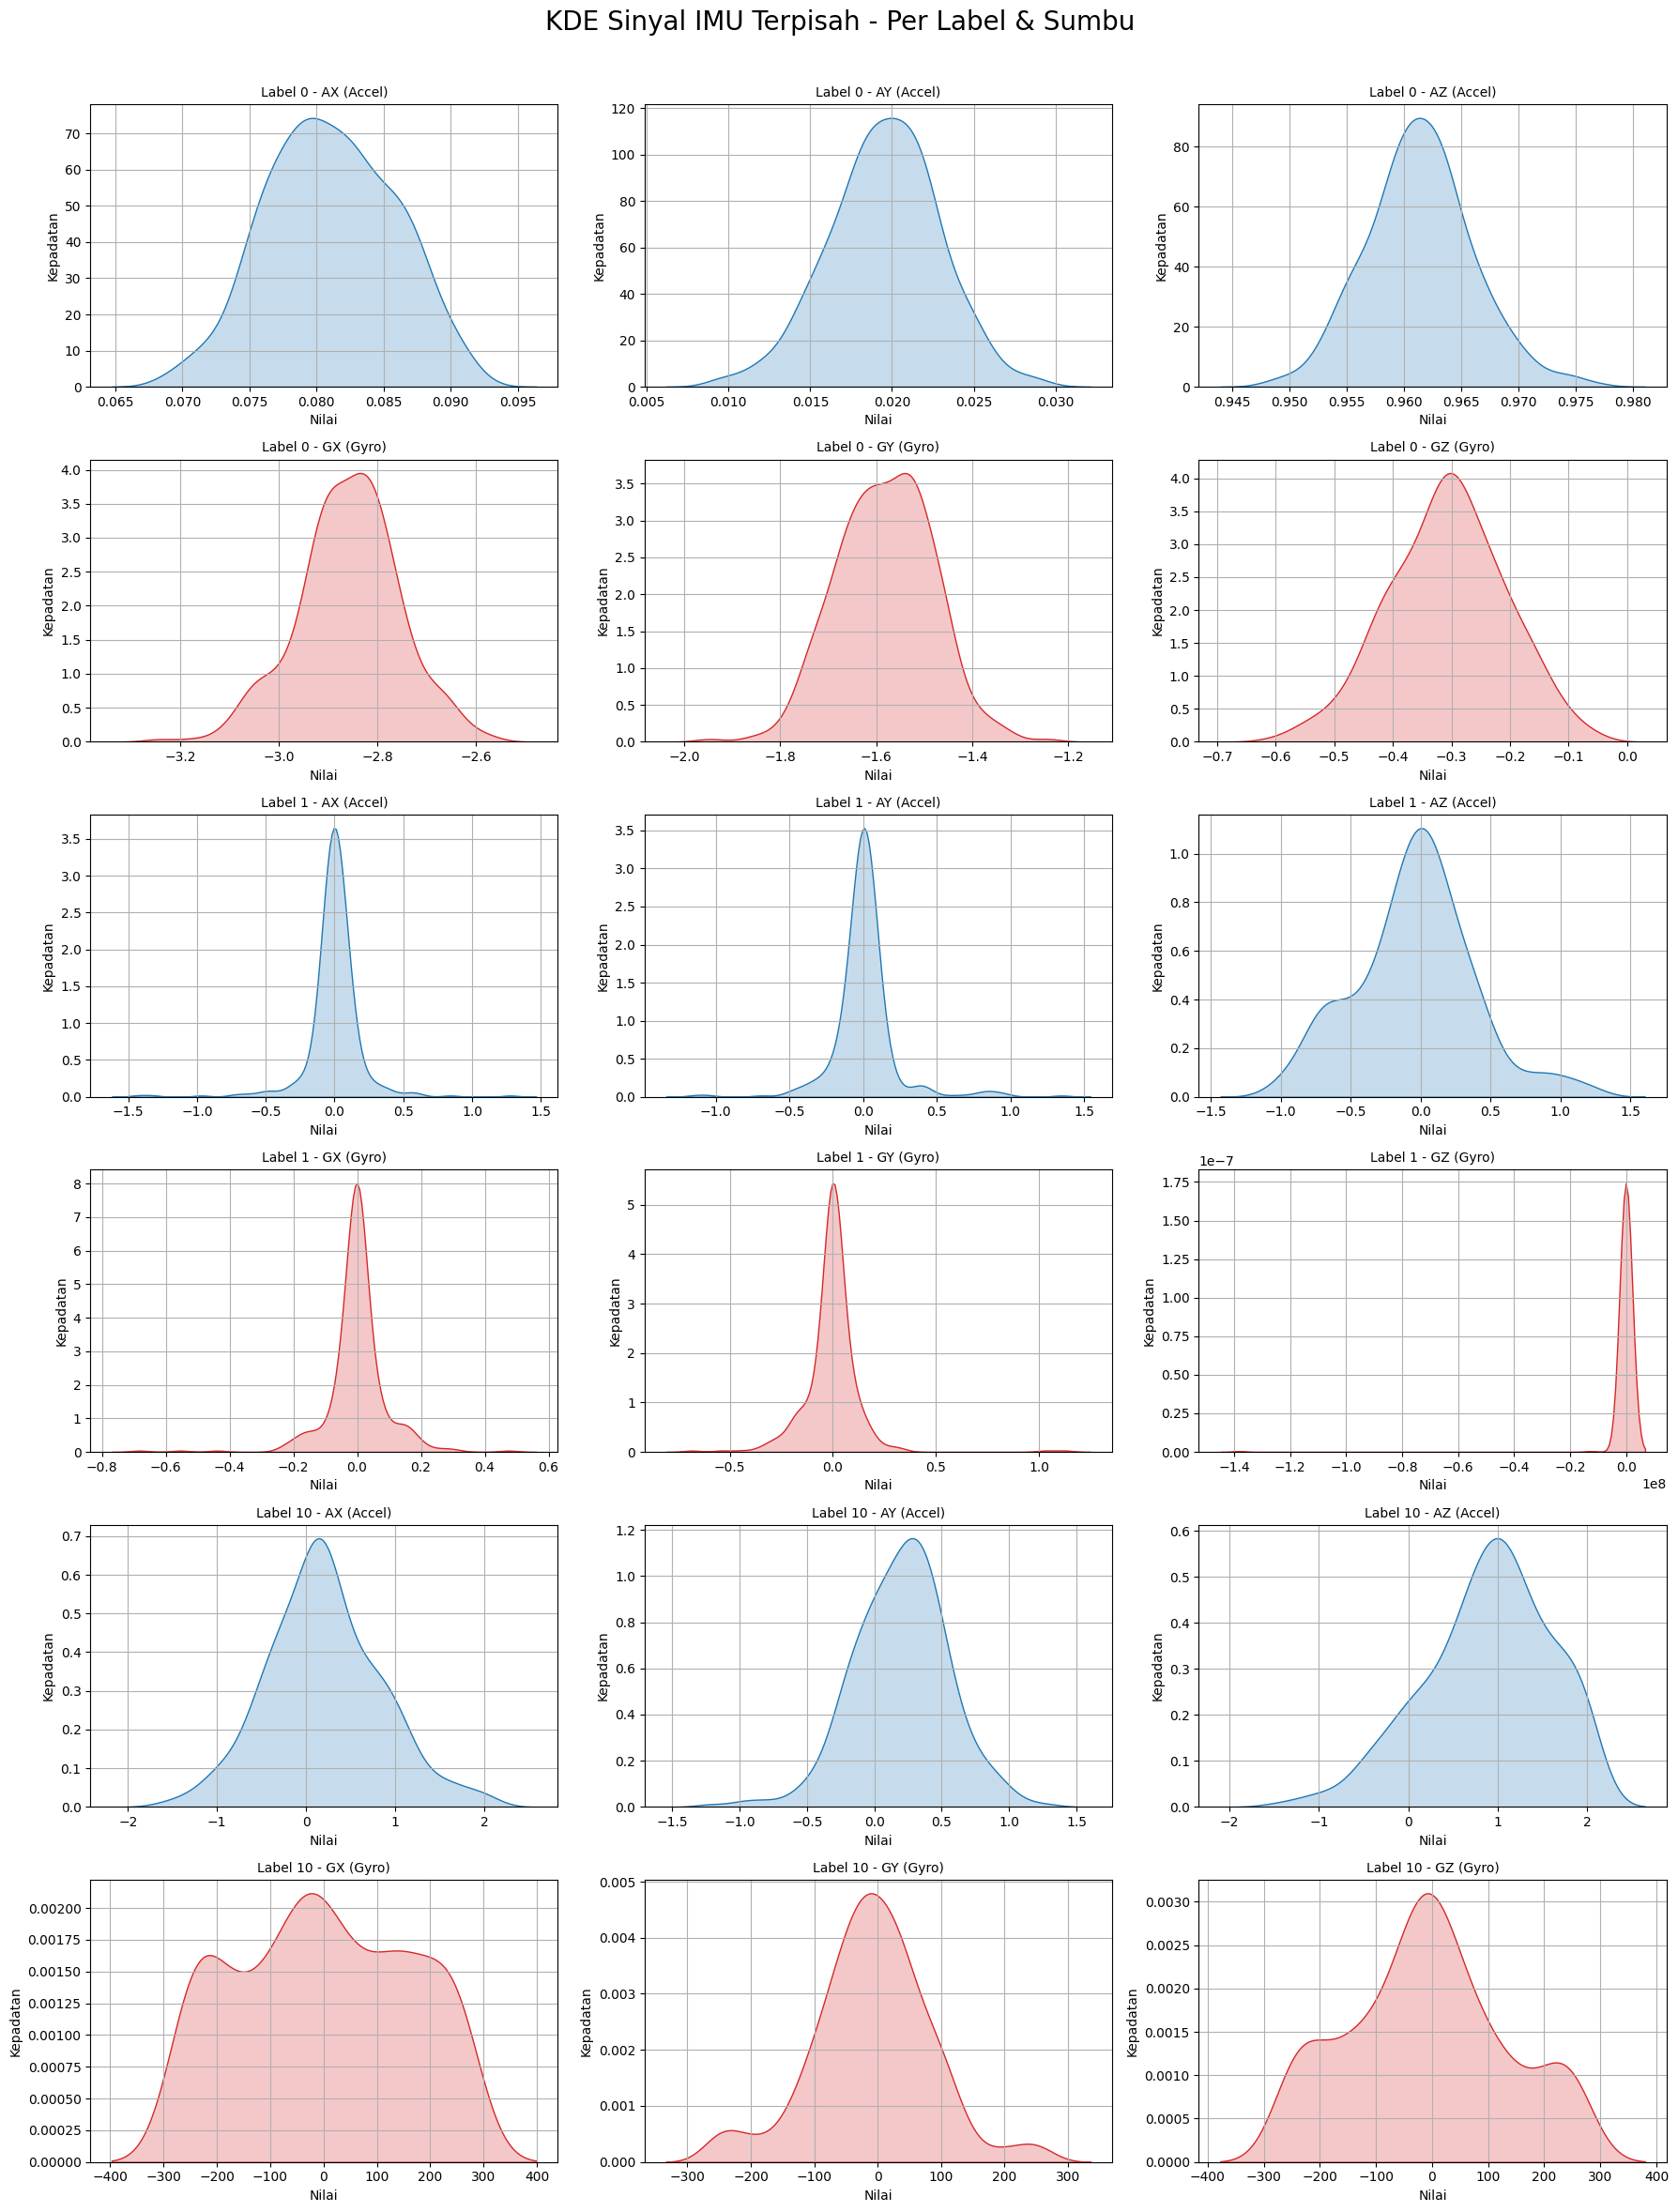

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("data_imu_oke.csv")
unique_labels = sorted(df['label'].unique())
axes_acc = ['ax', 'ay', 'az']
axes_gyro = ['gx', 'gy', 'gz']
total_plots = len(unique_labels) * (len(axes_acc) + len(axes_gyro))

# Definisi warna
acc_color = 'tab:blue'
gyro_color = 'tab:red'

# Setup subplot grid
cols = 3
rows = total_plots // cols + (total_plots % cols != 0)
fig, axs = plt.subplots(rows, cols, figsize=(18, 4 * rows))
fig.suptitle("KDE Sinyal IMU Terpisah - Per Label & Sumbu", fontsize=20)
axs = axs.flatten()

plot_idx = 0
for label in unique_labels:
    subset = df[df['label'] == label].reset_index(drop=True)

    # KDE plot akselerometer
    for axis in axes_acc:
        sns.kdeplot(data=subset, x=axis, ax=axs[plot_idx], color=acc_color, fill=True)
        axs[plot_idx].set_title(f'Label {label} - {axis.upper()} (Accel)', fontsize=10)
        axs[plot_idx].set_xlabel('Nilai')
        axs[plot_idx].set_ylabel('Kepadatan')
        axs[plot_idx].grid(True)
        plot_idx += 1

    # KDE plot gyroscope
    for axis in axes_gyro:
        sns.kdeplot(data=subset, x=axis, ax=axs[plot_idx], color=gyro_color, fill=True)
        axs[plot_idx].set_title(f'Label {label} - {axis.upper()} (Gyro)', fontsize=10)
        axs[plot_idx].set_xlabel('Nilai')
        axs[plot_idx].set_ylabel('Kepadatan')
        axs[plot_idx].grid(True)
        plot_idx += 1

# Kosongkan subplot sisa jika ada
for i in range(plot_idx, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("imu_kde_per_label_sumbu.png", dpi=300)
print("📁 Gambar KDE disimpan sebagai: imu_kde_per_label_sumbu.png")
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def export_all_label_tables(df, label_col='label', mode='both', out_dir='label_exports'):
    """
    Ekspor summary statistik per label ke PNG dan/atau CSV
    """
    os.makedirs(out_dir, exist_ok=True)
    labels = sorted(df[label_col].unique())

    for label in labels:
        subset = df[df[label_col] == label].drop(columns=[label_col])
        summary = subset.describe().T[['mean', 'std']]
        summary['mean ± std'] = summary['mean'].round(3).astype(str) + " ± " + summary['std'].round(3).astype(str)

        if mode in ['csv', 'both']:
            summary.to_csv(f"{out_dir}/label_{label}_summary.csv")
        
        if mode in ['png', 'both']:
            plt.figure(figsize=(10, 0.4 * len(summary)))
            sns.heatmap(summary[['mean']], annot=True, fmt=".3f", cmap='Blues', cbar=False)
            plt.title(f"📊 Summary Label {label}", fontsize=12)
            plt.tight_layout()
            plt.savefig(f"{out_dir}/label_{label}_summary.png", dpi=300)
            plt.close()

    print(f"Semua tabel label diekspor ke folder: {out_dir}/")


In [10]:
export_all_label_tables(df, mode='both')


Semua tabel label diekspor ke folder: label_exports/


/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_2563/1621860661.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_2563/1621860661.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(f"{out_dir}/label_{label}_summary.png", dpi=300)
/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_2563/1621860661.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_2563/1621860661.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(f"{out_dir}/label_{label}_summary.png", dpi=300)
/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_2563/1621860661.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lt/2mkl6

In [11]:
### cuplikan data IMU
def export_all_label_tables(df, mode='both', save_prefix='cuplikan_per_label'):
    import matplotlib.pyplot as plt

    all_samples = []
    for label in sorted(df['label'].unique()):
        sample = df[df['label'] == label][['ax', 'ay', 'az', 'gx', 'gy', 'gz']]
        sample = sample.head(5).copy()
        sample['label'] = label  # Tambahkan label kolom
        all_samples.append(sample)

    df_combined = pd.concat(all_samples, ignore_index=True)

    if mode in ['latex', 'both']:
        latex_code = df_combined.to_latex(index=False)
        with open(f"{save_prefix}.tex", "w") as f:
            f.write(latex_code)
        print(f"LaTeX disimpan sebagai: {save_prefix}.tex")

    if mode in ['png', 'both']:
        fig, ax = plt.subplots(figsize=(12, max(2, len(df_combined) // 3)))
        ax.axis('off')
        tbl = ax.table(cellText=df_combined.values,
                       colLabels=df_combined.columns,
                       cellLoc='center',
                       loc='center')
        tbl.auto_set_font_size(False)
        tbl.set_fontsize(9)
        tbl.scale(1.2, 1.4)
        plt.title("Cuplikan Data IMU per Label (5 Baris)", fontsize=14)
        plt.tight_layout()
        plt.savefig(f"{save_prefix}.png", dpi=300)
        print(f"PNG disimpan sebagai: {save_prefix}.png")
        plt.close()


In [33]:
#### Proses ekstract fitur FFT frekwensi dominan
import numpy as np
import pandas as pd
from scipy.stats import entropy
from scipy.fft import rfft

def extract_features(window):
    features = {}
    for axis in window.columns:
        signal = window[axis].values

        features[f'{axis}_mean'] = np.mean(signal)
        features[f'{axis}_std'] = np.std(signal)
        features[f'{axis}_max'] = np.max(signal)
        features[f'{axis}_min'] = np.min(signal)
        features[f'{axis}_energy'] = np.sum(signal**2)
        features[f'{axis}_entropy'] = entropy(np.histogram(signal, bins=20, density=True)[0] + 1e-8)

        # FFT: dominant frequency
        fft_vals = np.abs(rfft(signal))
        fft_freqs = np.fft.rfftfreq(len(signal), d=1)
        dom_freq = fft_freqs[np.argmax(fft_vals[1:]) + 1]  # skip DC
        features[f'{axis}_dominant_freq'] = dom_freq
    return features

def build_feature_dataframe_from_imu(df, fs=50, window_duration=2, stride_ratio=0.5):
    window_size = int(fs * window_duration)
    stride_size = int(window_size * stride_ratio)

    df = df.copy()
    df.columns = df.columns.str.strip().str.lower()

    data = []
    for start in range(0, len(df) - window_size + 1, stride_size):
        end = start + window_size
        window = df.iloc[start:end]
        if 'label' not in window.columns:
            continue

        label = window['label'].mode().values[0]
        window_data = window.drop(columns=['label'])

        feats = extract_features(window_data)
        feats['label'] = label
        data.append(feats)

    return pd.DataFrame(data)


In [34]:
### mulai FFT
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq

def plot_fft_single_window(window, fs=50, save_path="fft_output.png"):
    window = window.drop(columns=['label'], errors='ignore')
    sample_count = window.shape[0]
    time_vector = np.arange(sample_count) / fs

    plt.figure(figsize=(12, 4 * len(window.columns)))

    for i, axis in enumerate(window.columns):
        signal = window[axis].values
        fft_vals = np.abs(rfft(signal))
        fft_freqs = rfftfreq(sample_count, d=1/fs)

        plt.subplot(len(window.columns), 1, i + 1)
        plt.plot(fft_freqs, fft_vals, color='darkorange')
        plt.title(f"FFT - Axis {axis}")
        plt.xlabel("Frekuensi (Hz)")
        plt.ylabel("Magnitudo")
        plt.grid(True)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)  # Simpan ke PNG sebelum show
    print(f"FFT disimpan sebagai: {save_path}")
    plt.show()


FFT disimpan sebagai: fft_output.png


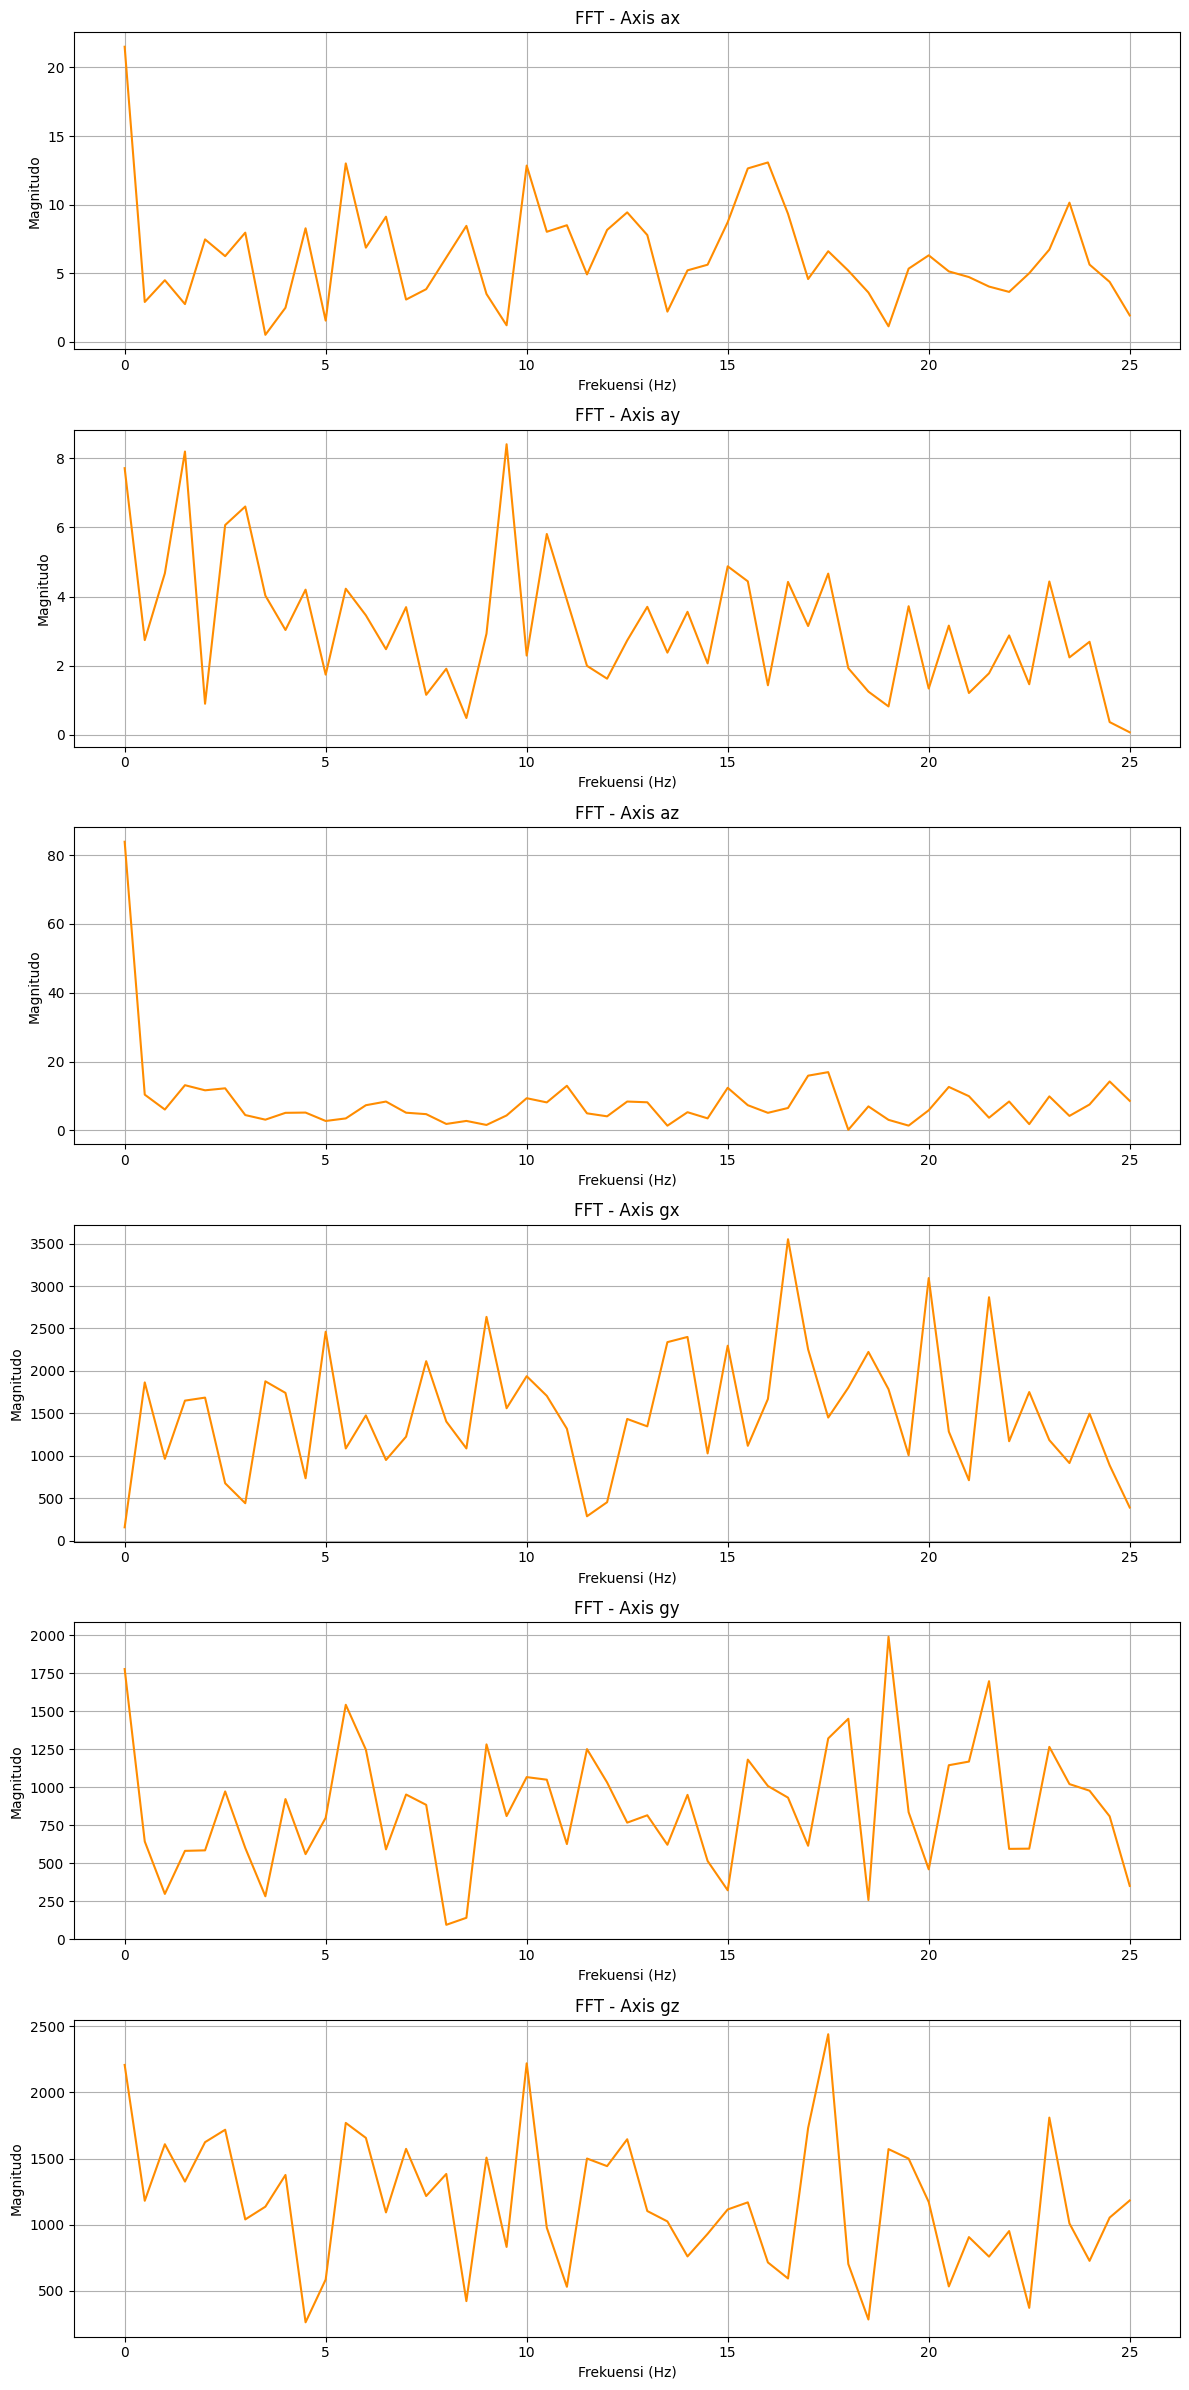

In [14]:
#### Mulai Visualkan FFT per sumbu
import pandas as pd

df_raw = pd.read_csv("data_imu_oke.csv")  # Pastikan nama file sesuai dan path-nya benar
window_label_10 = df_raw[df_raw['label'] == 10].iloc[0:100]
plot_fft_single_window(window_label_10, fs=50)


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq

def compare_fft_by_label(df_raw, fs=50, window_size=100, axis='ax', max_labels=3, save_path="fft_per_label.png"):
    unique_labels = df_raw['label'].value_counts().nlargest(max_labels).index

    plt.figure(figsize=(10, 4 * len(unique_labels)))
    for i, label in enumerate(unique_labels):
        df_label = df_raw[df_raw['label'] == label]
        window = df_label.iloc[:window_size]
        signal = window[axis].values

        fft_vals = np.abs(rfft(signal))
        fft_freqs = rfftfreq(len(signal), d=1/fs)

        plt.subplot(len(unique_labels), 1, i + 1)
        plt.plot(fft_freqs, fft_vals, label=f'Label {label}', color='teal')
        plt.title(f'FFT Axis {axis} - Label {label}')
        plt.xlabel('Frekuensi (Hz)')
        plt.ylabel('Magnitudo')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)  # Simpan sebelum tampilkan
    print(f"Gambar FFT per label disimpan sebagai: {save_path}")
    plt.show()


Gambar FFT per label disimpan sebagai: fft_ax_per_label.png


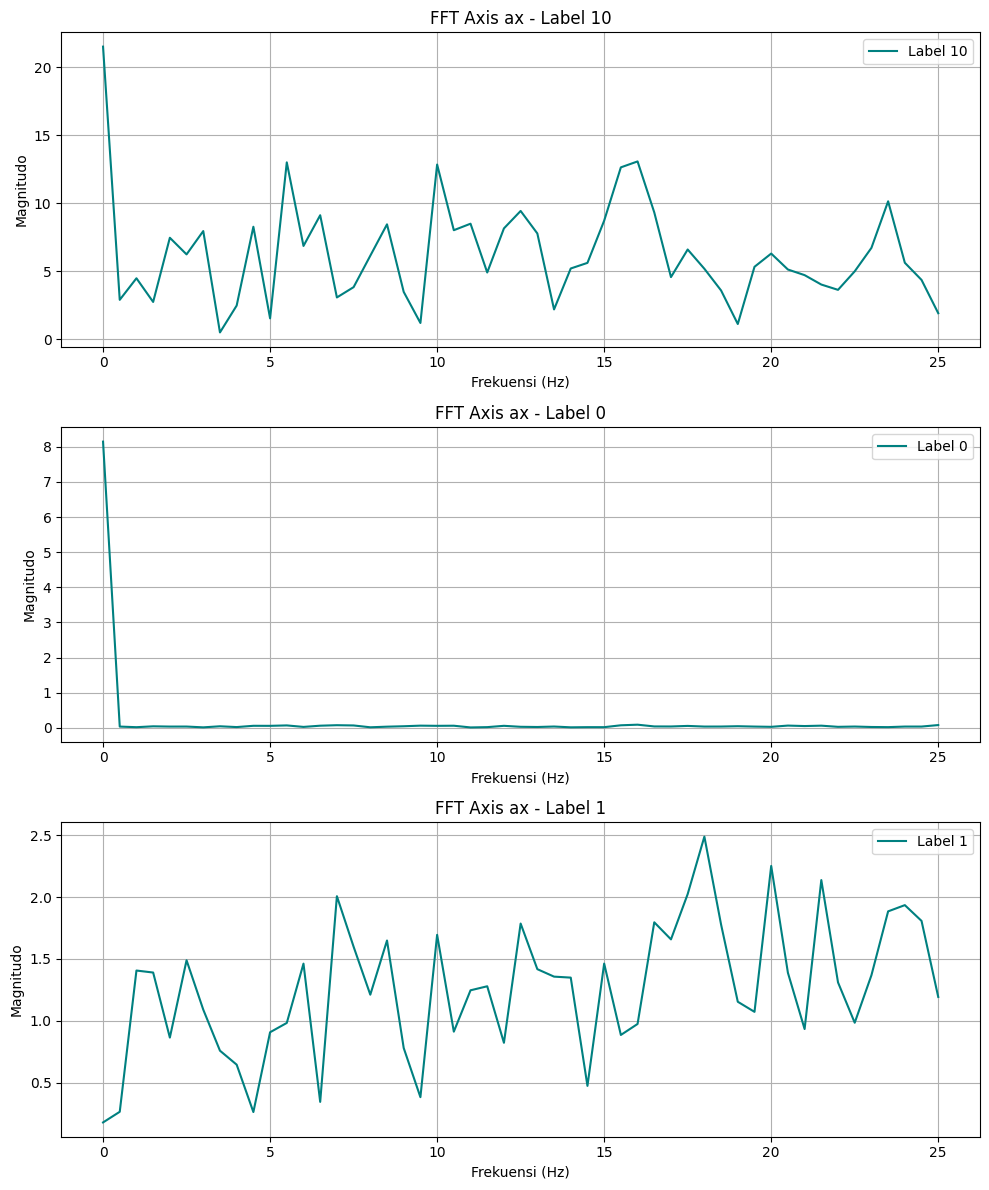

In [16]:
### Mulai Visualisasi per label FFT
compare_fft_by_label(df_raw, fs=50, axis='ax', window_size=100, max_labels=5,
save_path="fft_ax_per_label.png")



In [17]:
print(df_raw.columns.tolist())


['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'label']


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq

def plot_fft_comparison_single_frame(df_raw, fs=50, window_size=100, axis='Ax', max_labels=3, save_path="fft_single_frame.png"):
    """
    Visualisasi spektrum FFT dari beberapa label dalam 1 frame grafik dan menyimpannya ke PNG
    """
    unique_labels = df_raw['label'].value_counts().nlargest(max_labels).index
    fft_freqs = None
    plt.figure(figsize=(8, 5))

    for label in unique_labels:
        df_label = df_raw[df_raw['label'] == label]
        window = df_label.iloc[:window_size]

        if axis not in window.columns:
            print(f"Kolom '{axis}' tidak ditemukan di window label {label}. Skip.")
            continue

        signal = window[axis].values
        fft_vals = np.abs(rfft(signal))
        fft_freqs = rfftfreq(len(signal), d=1/fs)

        plt.plot(fft_freqs, fft_vals, label=f'Label {label}', linewidth=2)

    plt.title(f"Spektrum FFT Axis '{axis}' per Label")
    plt.xlabel("Frekuensi (Hz)")
    plt.ylabel("Magnitudo")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    print(f"Gambar disimpan sebagai: {save_path}")
    plt.show()
    plt.close()


Gambar disimpan sebagai: fft_ax_labels_frame.png


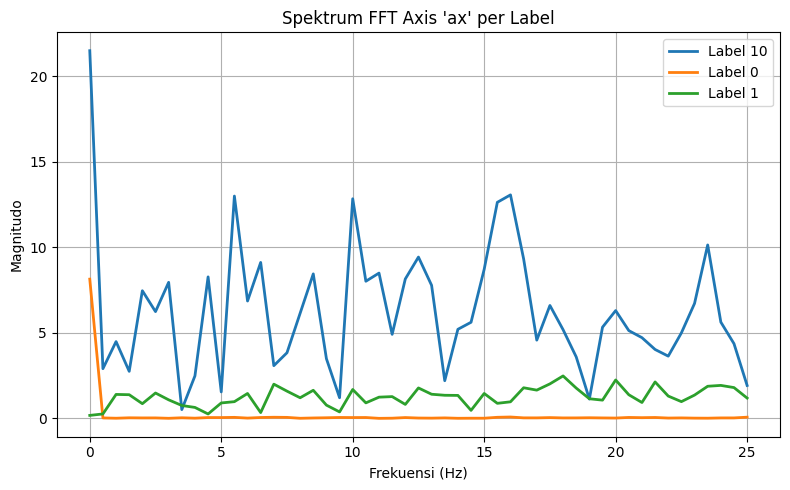

In [19]:
plot_fft_comparison_single_frame(df_raw, fs=50, window_size=100, axis='ax', max_labels=5,
save_path="fft_ax_labels_frame.png")


In [20]:
### pembuatan features_df
import pandas as pd

# Baca data
df_raw = pd.read_csv("data_imu_oke.csv")

# Ekstraksi fitur lengkap
features_df = build_feature_dataframe_from_imu(df_raw, fs=50, window_duration=2, stride_ratio=0.5)

# Cek hasil
print(f"{features_df.shape[0]} window berhasil diolah.")
print("Distribusi label per window:")
print(features_df['label'].value_counts())


20 window berhasil diolah.
Distribusi label per window:
label
1     7
0     7
10    6
Name: count, dtype: int64


In [21]:
features_df.to_csv("features_cleo_ready.csv", index=False)


/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_2563/768517214.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=features_df, x='label', palette='Set2')


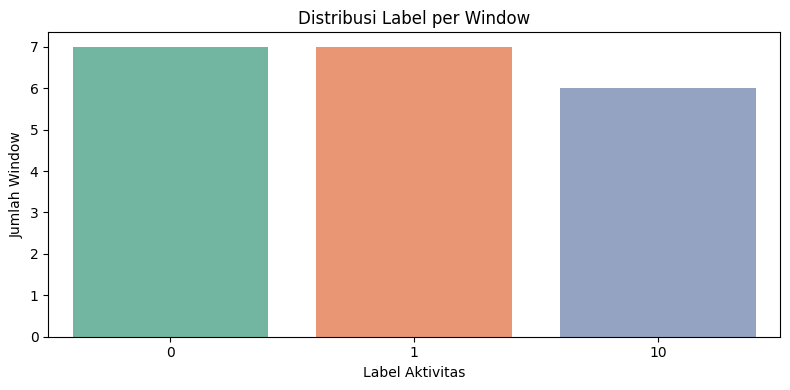

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(data=features_df, x='label', palette='Set2')
plt.title("Distribusi Label per Window")
plt.xlabel("Label Aktivitas")
plt.ylabel("Jumlah Window")
plt.tight_layout()

# Simpan sebagai file PNG
plt.savefig("distribusi_label.png", dpi=300)

plt.show()


/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_2563/2130248668.py:7: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_2563/2130248668.py:9: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.savefig("korelasi_fitur.png", dpi=300)  # Simpan dulu!


Gambar disimpan sebagai: korelasi_fitur.png


/Users/verykurniabakti/envs/visenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


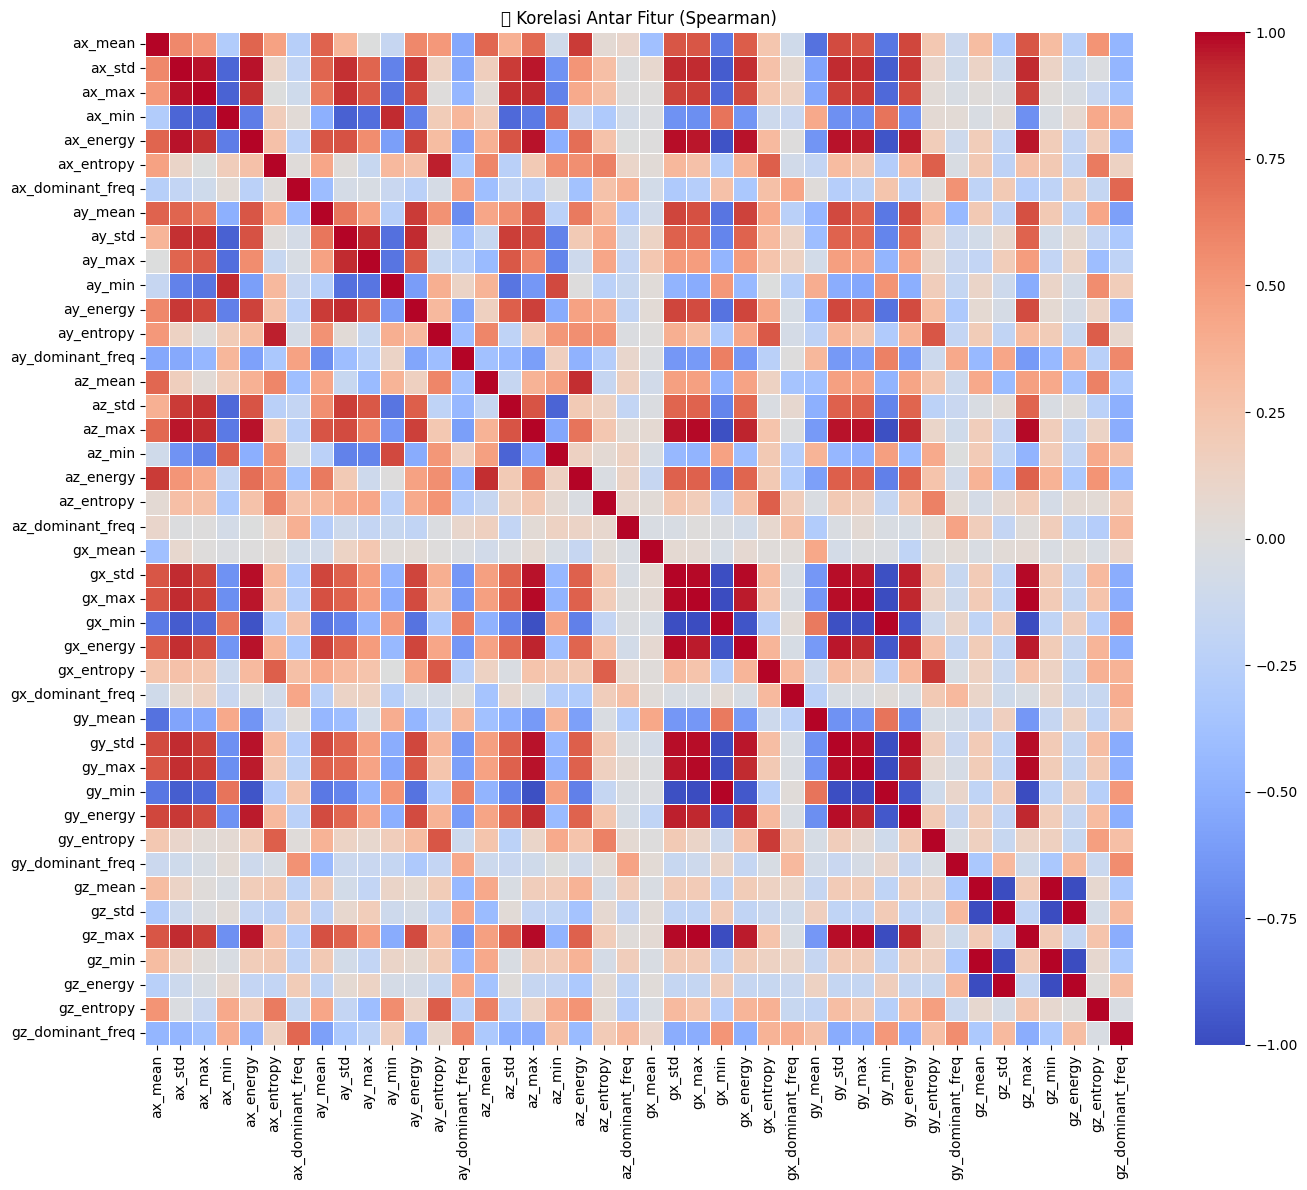

In [23]:
# Hanya fitur numerik (drop kolom 'label' untuk korelasi)
corr = features_df.drop(columns=['label']).corr()

plt.figure(figsize=(14,12))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("🔗 Korelasi Antar Fitur (Spearman)")
plt.tight_layout()

plt.savefig("korelasi_fitur.png", dpi=300)  # Simpan dulu!
print("Gambar disimpan sebagai: korelasi_fitur.png")

plt.show()  # Baru tampilkan
plt.close()  # Tutup figure agar tidak bentrok dengan plot berikutnya


In [24]:
def run_safe_cleo_pipeline(
    features_df,
    min_count_start=5,
    min_label_required=2,
    log_file="dropped_labels.txt",
    cleo_params=None,
    verbose=True
):
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC
    from sklearn.metrics import classification_report, accuracy_score
    import time

    df = features_df.copy()
    min_count = min_count_start
    valid_labels = []

    # Step 1: Turunkan min_count sampai memenuhi syarat minimum label
    while min_count >= 1:
        label_counts = df['label'].value_counts()
        valid_labels = label_counts[label_counts >= min_count].index
        if len(valid_labels) >= min_label_required:
            break
        min_count -= 1

    df_filtered = df[df['label'].isin(valid_labels)].reset_index(drop=True)
    dropped = label_counts[label_counts < min_count]

    if verbose:
        print(f"min_count disesuaikan ke: {min_count}")
        print(f"{len(valid_labels)} label dipertahankan ({df_filtered.shape[0]} sampel)")

    # Step 2: Simpan log label yang dibuang
    with open(log_file, "w") as f:
        if not dropped.empty:
            f.write(f"Label dibuang (kurang dari {min_count} sampel):\n")
            for label, count in dropped.items():
                f.write(f"  Label {label}: {count} sampel\n")
        else:
            f.write("Tidak ada label minor yang dibuang.\n")

    if len(valid_labels) < min_label_required:
        raise ValueError(f"Gagal lanjut: hanya ada {len(valid_labels)} label setelah filtering, minimal {min_label_required} diperlukan.")

    # Step 3: Siapkan X dan y
    X = df_filtered.drop(columns=['label']).values
    y = df_filtered['label'].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 4: Jalankan CLEO
    print("Menjalankan CLEO...")
    start = time.time()
    idx_selected, best_C, best_gamma, acc_log = cleo_svm_optimizer(
        X_scaled, y,
        **(cleo_params if cleo_params else {})
    )
    end = time.time()

    # Step 5: Evaluasi SVM akhir
    X_sel = X_scaled[:, idx_selected]
    X_train, X_test, y_train, y_test = train_test_split(
        X_sel, y, test_size=0.3, stratify=y, random_state=42)

    clf = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("\nEvaluasi SVM dengan Fitur Terpilih:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"Akurasi Akhir: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Durasi CLEO: {end - start:.2f} detik")

    return {
        "df_filtered": df_filtered,
        "selected_features": idx_selected,
        "C": best_C,
        "gamma": best_gamma,
        "accuracy": accuracy_score(y_test, y_pred),
        "acc_log": acc_log
    }


In [25]:
features_df = build_feature_dataframe_from_imu(df_raw, fs=50, window_duration=2, stride_ratio=0.5)


In [26]:
def cleo_svm_optimizer(X, y, max_iter=30):
    from sklearn.feature_selection import SelectKBest, mutual_info_classif
    from sklearn.model_selection import cross_val_score
    from sklearn.svm import SVC

    acc_log = []
    best_acc = 0
    best_idx = None
    best_C, best_gamma = 1.0, 'scale'

    for k in range(5, min(30, X.shape[1]), 5):
        selector = SelectKBest(mutual_info_classif, k=k)
        X_sel = selector.fit_transform(X, y)
        clf = SVC(kernel='rbf')
        acc = cross_val_score(clf, X_sel, y, cv=3).mean()
        acc_log.append(acc)
        if acc > best_acc:
            best_acc = acc
            best_idx = selector.get_support(indices=True)
    
    return best_idx, best_C, best_gamma, acc_log


In [27]:
result_cleo = run_safe_cleo_pipeline(
    features_df,
    min_count_start=5,
    min_label_required=2,
    cleo_params={"max_iter":30},
    verbose=True
)


min_count disesuaikan ke: 5
3 label dipertahankan (20 sampel)
Menjalankan CLEO...

Evaluasi SVM dengan Fitur Terpilih:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Akurasi Akhir: 1.0000
Durasi CLEO: 0.43 detik


In [28]:
import matplotlib.pyplot as plt

def plot_cleo_accuracy(acc_log, title="Evolusi Akurasi CLEO", save_path=None):
    plt.figure(figsize=(6, 4))
    plt.plot(acc_log, marker='o', linestyle='-', color='seagreen', label='Akurasi')
    plt.axhline(y=max(acc_log), color='gray', linestyle='--', label=f'Max: {max(acc_log):.4f}')
    best_idx = acc_log.index(max(acc_log))
    plt.scatter(best_idx, max(acc_log), color='red')
    plt.text(best_idx, max(acc_log)+0.01, f'Iter {best_idx}', ha='center', fontsize=9)

    plt.title(title)
    plt.xlabel("Iterasi")
    plt.ylabel("Akurasi")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Grafik disimpan ke: {save_path}")
    plt.show()


In [29]:
def auto_compare_cleo_pso(cleo_result, features_df, cv=3):
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    from sklearn.model_selection import cross_val_score
    import pyswarms as ps
    import numpy as np

    # CLEO result
    acc_cleo = cleo_result['accuracy']
    print(f"\nAkurasi CLEO + SVM: {acc_cleo:.4f}")

    # PSO baseline
    df = cleo_result['df_filtered']
    X = df.drop(columns=['label']).values
    y = df['label'].values
    X_scaled = StandardScaler().fit_transform(X)

    def fitness(params, X, y, cv):
        results = []
        for C, gamma in params:
            scores = cross_val_score(SVC(C=C, gamma=gamma, kernel='rbf'), X, y, cv=cv)
            results.append(-scores.mean())
        return np.array(results)

    bounds = ([1e-3, 1e-5], [100, 10])
    optimizer = ps.single.GlobalBestPSO(
        n_particles=20, dimensions=2,
        options={'c1': 0.5, 'c2': 0.3, 'w': 0.9},
        bounds=bounds
    )
    print("Menjalankan PSO-SVM...")
    best_cost, best_pos = optimizer.optimize(fitness, 50, X=X_scaled, y=y, cv=cv)
    C_opt, gamma_opt = best_pos
    
    scores = cross_val_score(SVC(C=C_opt, gamma=gamma_opt), X_scaled, y, cv=cv)
    acc_pso = scores.mean()
    print(f"Akurasi PSO-SVM: {acc_pso:.4f}")

    print("\nHasil Perbandingan:")
    print(f"CLEO + SVM  → {acc_cleo:.4f}")
    print(f"PSO-tuned SVM → {acc_pso:.4f}")


min_count disesuaikan ke: 5
3 label dipertahankan (20 sampel)
Menjalankan CLEO...

Evaluasi SVM dengan Fitur Terpilih:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Akurasi Akhir: 1.0000
Durasi CLEO: 0.36 detik


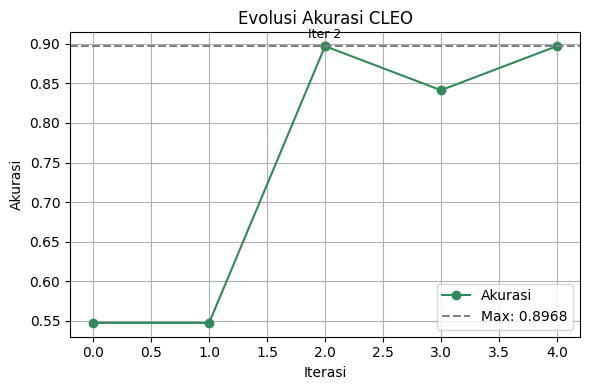

2025-07-28 07:45:24,983 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



Akurasi CLEO + SVM: 1.0000
Menjalankan PSO-SVM...


pyswarms.single.global_best: 100%|██████████|50/50, best_cost=-0.841
2025-07-28 07:45:26,786 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.8412698412698413, best pos: [8.27819433e+01 5.17269884e-02]


Akurasi PSO-SVM: 0.8413

Hasil Perbandingan:
CLEO + SVM  → 1.0000
PSO-tuned SVM → 0.8413


In [30]:
cleo_result = run_safe_cleo_pipeline(features_df)

# Visualisasi akurasi CLEO
plot_cleo_accuracy(cleo_result['acc_log'])

# Auto-compare ke PSO
auto_compare_cleo_pso(cleo_result, features_df)
